In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 59.4MB/s]
100% 1.06G/1.06G [00:08<00:00, 127MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 261ms/step - accuracy: 0.8251 - loss: 0.4342 - val_accuracy: 0.9124 - val_loss: 0.2150
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 256ms/step - accuracy: 0.8946 - loss: 0.2476 - val_accuracy: 0.9138 - val_loss: 0.2056
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 254ms/step - accuracy: 0.9066 - loss: 0.2220 - val_accuracy: 0.9164 - val_loss: 0.2012
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 238ms/step - accuracy: 0.9094 - loss: 0.2150 - val_accuracy: 0.9190 - val_loss: 0.1942
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 239ms/step - accuracy: 0.9156 - loss: 0.1997 - val_accuracy: 0.9086 - val_loss: 0.2105
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 238ms/step - accuracy: 0.9208 - loss: 0.1895 - val_accuracy: 0.9184 - val_loss: 0.1915
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 236ms/step - accuracy: 0.9222 - loss: 0.1814 - val_accuracy: 0.9228 - val_loss: 0.1815
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 251ms/step - accuracy: 0.9256 - loss: 0.17

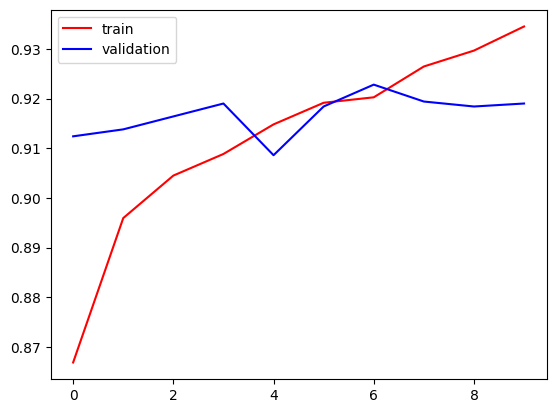

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

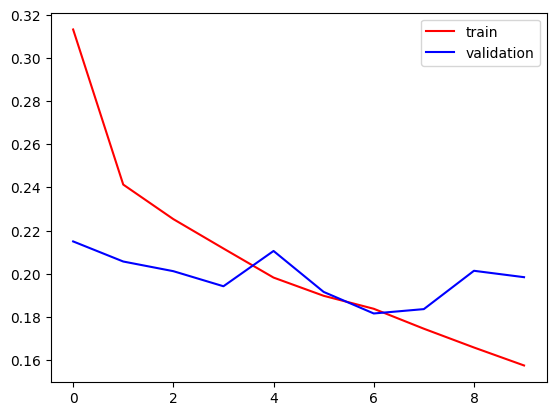

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()